<font color=#CC3D3D>
## Decision Tree Visualization

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier

##### Reading data

In [2]:
train = pd.read_csv('purchase_history.csv', encoding='cp949')
train

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,7.0,7.0,8.0,14.0,1.0,11.0,24.0,영캐주얼
6,69,0,816300,14,58307,1.7,10,10,7.1,40.0,4.0,4.0,6.0,NaN,NaN,3.0,11.0,유니캐주얼
7,82,0,752200,5,150440,2.6,5,3,60.0,100.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,화장품
8,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,NaN,2.0,10.0,1.0,8.0,4.0,화장품
9,100,0,442160,16,27635,1.0,10,6,25.0,33.3,NaN,5.0,11.0,NaN,NaN,3.0,13.0,화장품


##### Feature engineering

In [3]:
train = train.fillna(0)
train = pd.get_dummies(train)

X_train = train.drop(['custid', 'gender'], axis=1)
y_train = train.gender

##### Modeing

In [4]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train, y_train).score(X_train, y_train)

0.7002

##### Visualizing decision tree using [graphviz](http://scikit-learn.org/stable/modules/tree.html)

In [5]:
from sklearn.tree import export_graphviz
import graphviz

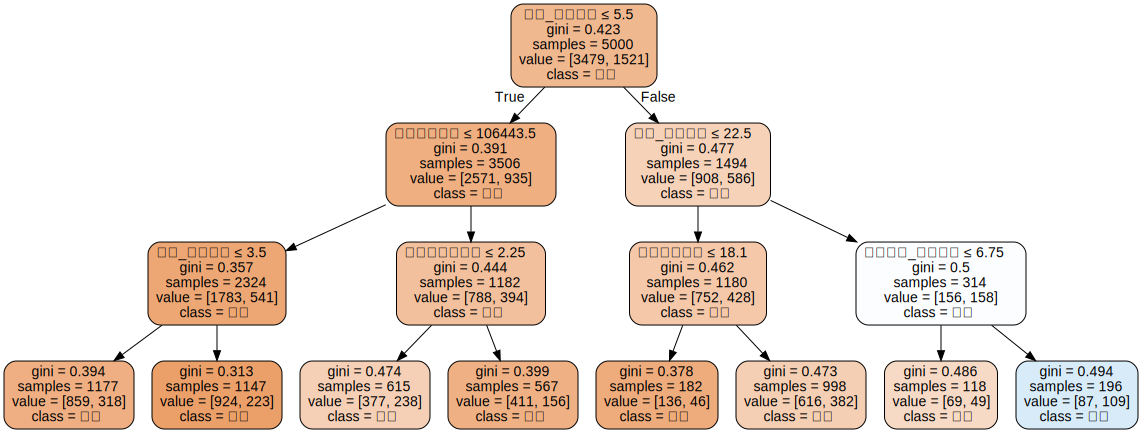

In [6]:
dot_data = export_graphviz(clf, out_file="tree.dot",
                           feature_names=X_train.columns,  
                           class_names=['여자','남자'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

with open("tree.dot", encoding='utf-8') as f:  # 한글 처리
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='tree', cleanup=True)
    
dot    

### Visualizing decision tree using [dtreeviz](https://github.com/parrt/dtreeviz)

In [7]:
from dtreeviz.trees import *

In [8]:
classifier = tree.DecisionTreeClassifier(max_depth=2, random_state=0) 
iris = load_iris()
classifier.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

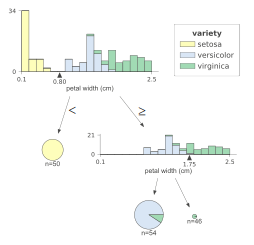

In [9]:
viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz

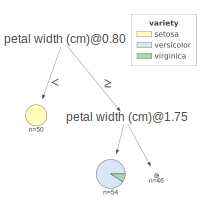

In [10]:
# Decision tree without scatterplot or histograms for decision nodes

viz = dtreeviz(classifier,
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               fancy=False )  # fance=False to remove histograms/scatterplots from decision nodes
              
viz

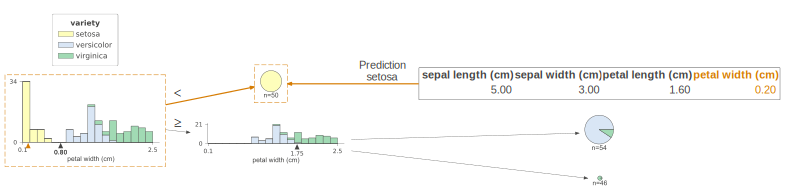

In [11]:
# Prediction path

X = iris.data[np.random.randint(0, len(iris.data)),:]  # random sample from training
viz = dtreeviz(classifier,
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               orientation ='LR',  # left-right orientation
               X=X)  # need to give single observation for prediction
              
viz

<font color=#CC3D3D>
## End